In [ ]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.3.1

import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 67.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.1 which is incompatible.


100%|██████████| 8.91k/8.91k [00:00<00:00, 8.53MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1


In [ ]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
# Assuming 'diabetes.csv' is the file name within the downloaded directory.
# Adjust the file name if necessary.
try:
  df = pd.read_csv(path + '/diabetes.csv')
except FileNotFoundError:
  print(f"Error: File 'diabetes.csv' not found in the specified path: {path}")
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


In [ ]:
df_copy.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


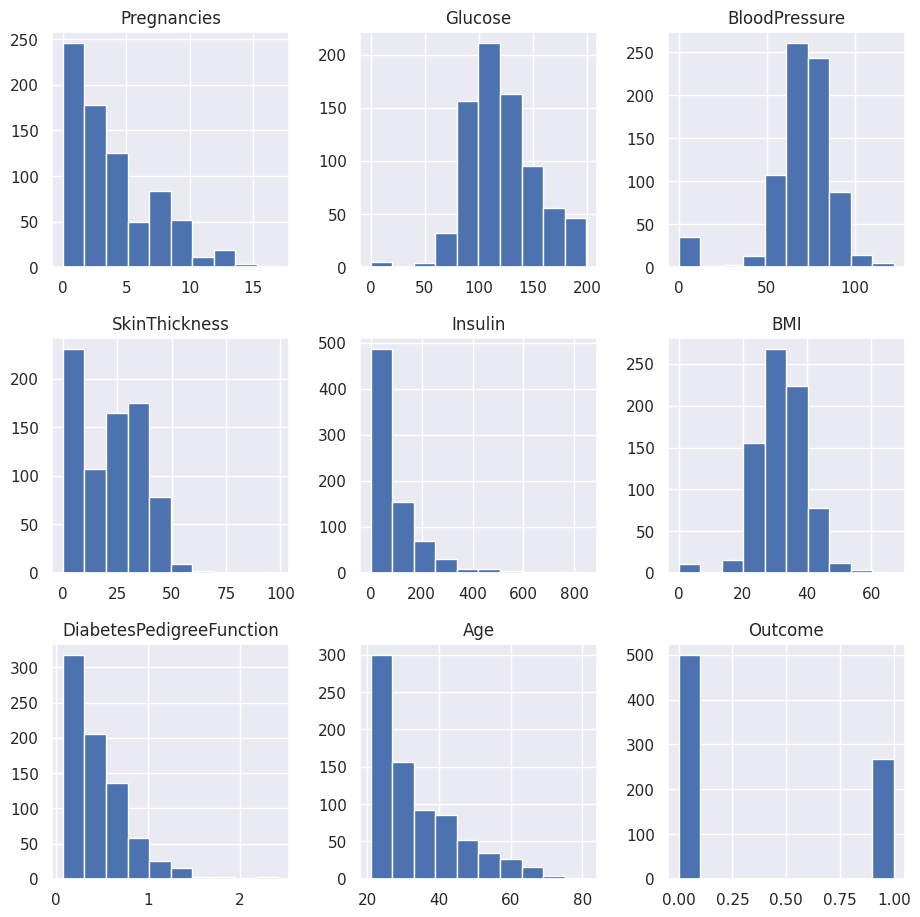

In [ ]:
df_hist = df.hist(figsize = (11,11))


In [ ]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)


In [ ]:
df_copy.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


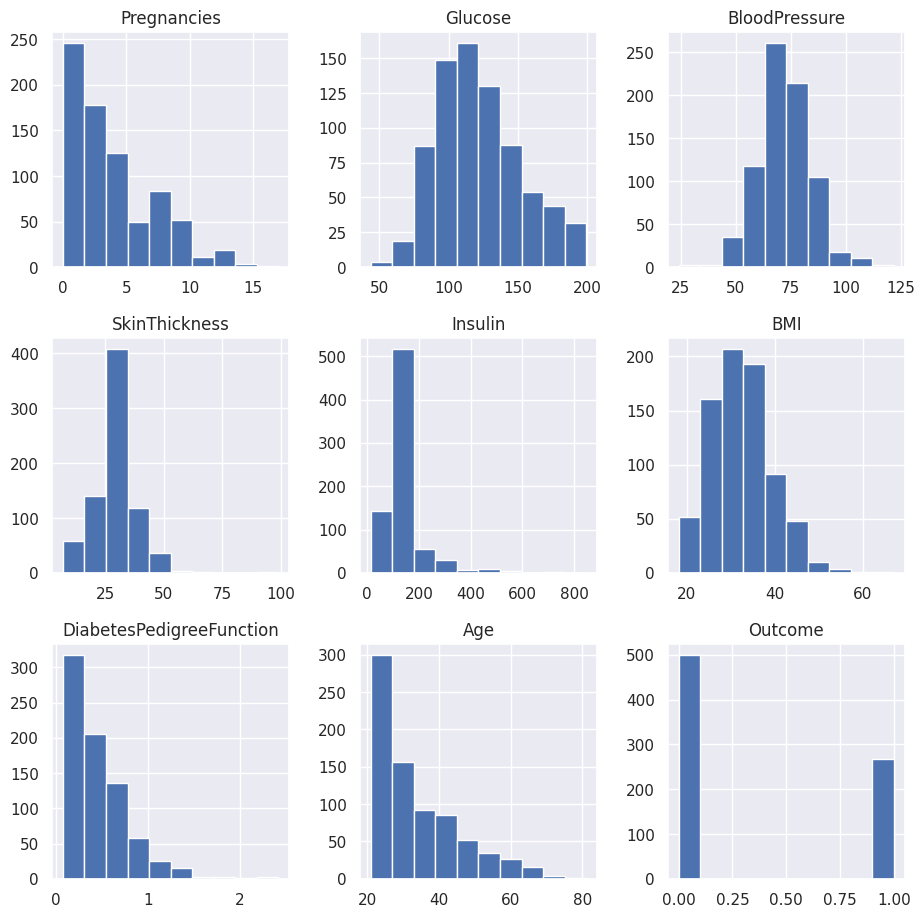

In [ ]:
p = df_copy.hist(figsize = (11,11))


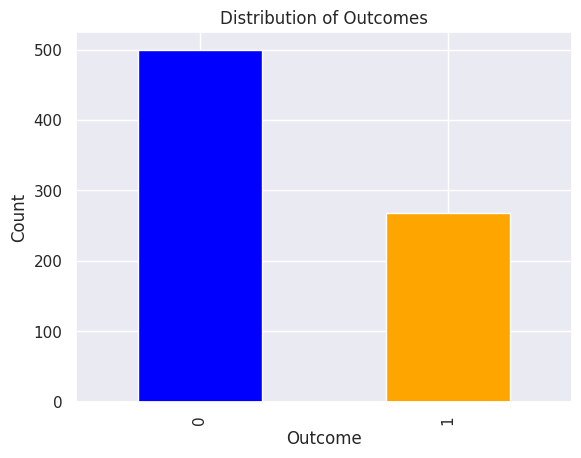

In [ ]:
df["Outcome"].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.title("Distribution of Outcomes")
plt.show()

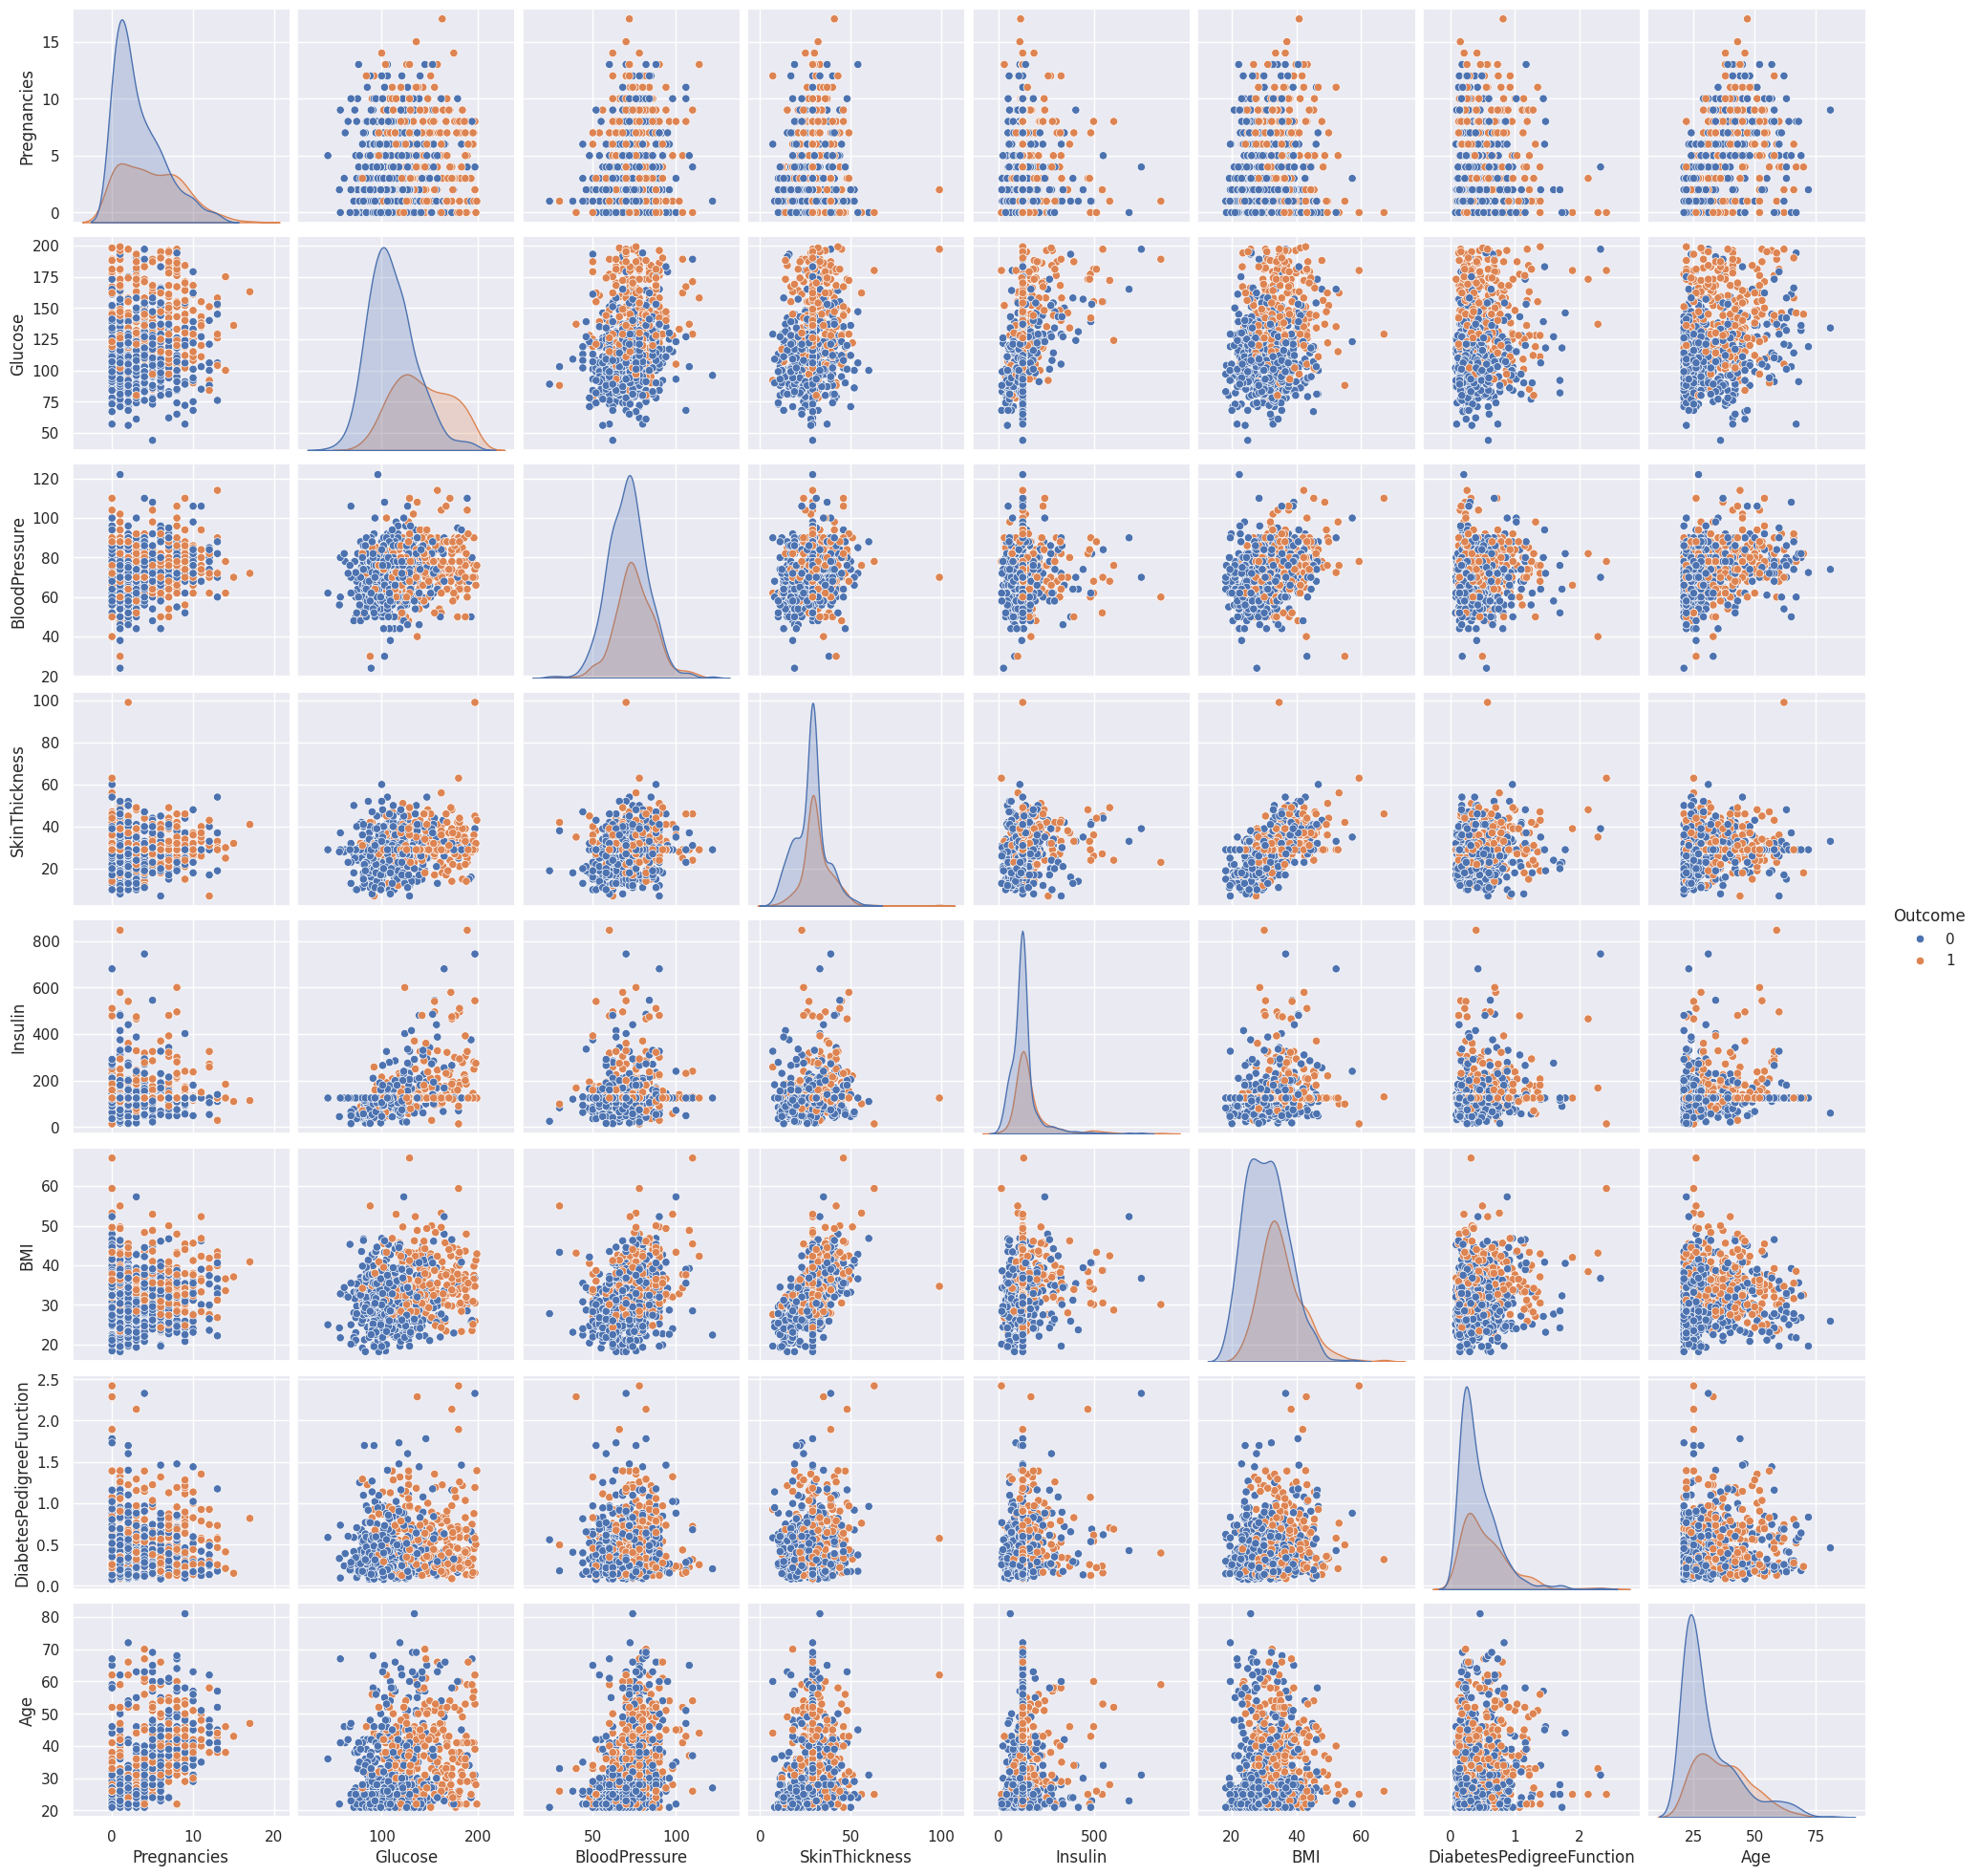

In [ ]:
#pairplot of cleaned data
p=sns.pairplot(df_copy, hue = 'Outcome')


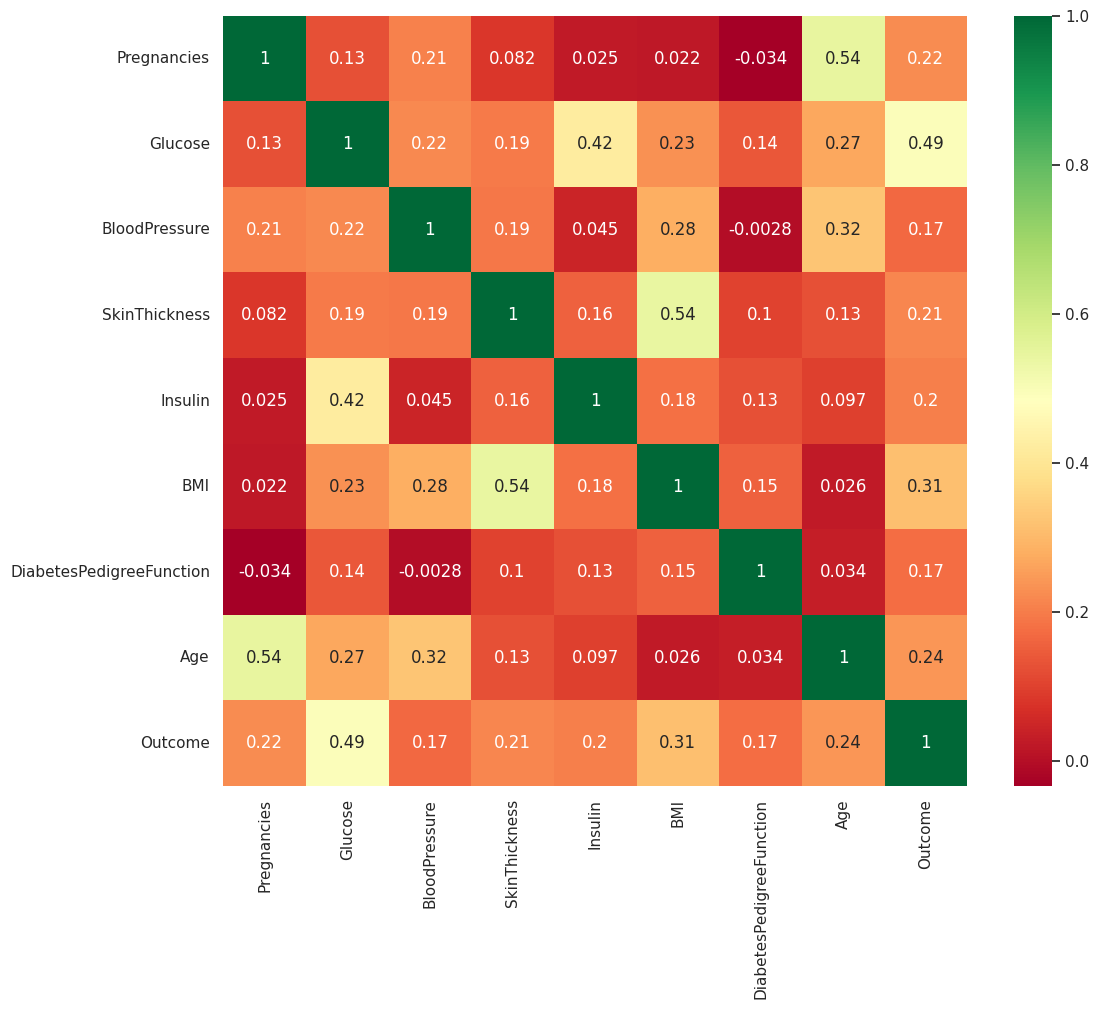

In [ ]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df_copy.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap


In [ ]:
# Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_columns = df_copy.columns.drop("Outcome")
df_copy[feature_columns] = scaler.fit_transform(df_copy[feature_columns])
X = df_copy.drop("Outcome", axis=1)
y = df_copy["Outcome"]

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.680125,0.297376,2.150354,0.455573,0.064737,-0.908682,2.532136
764,-0.547919,0.010298,-0.198965,-0.239949,-0.181541,0.632365,-0.398282,-0.531023
765,0.342981,-0.022579,-0.033518,-0.695245,-0.332132,-0.910418,-0.685193,-0.275760
766,-0.844885,0.141808,-1.026200,-0.012301,-0.181541,-0.342790,-0.371101,1.170732


In [ ]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [ ]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

# Train models
models = {
    "XGBoost": xgb.XGBClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine (SVM)": SVC(probability=True, random_state=42),
    "Gradient Boosting (GBM)": GradientBoostingClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

In [ ]:
# Evaluate models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    return accuracy, precision, recall, f1, roc_auc, cm, fpr, tpr



In [ ]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy, precision, recall, f1, roc_auc, cm, fpr, tpr = evaluate_model(model, X_test, y_test)
    results[name] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": roc_auc,
        "confusion_matrix": cm,
        "fpr": fpr,
        "tpr": tpr
    }



In [ ]:
# Print results
for name, metrics in results.items():
    print(f"{name} Metrics:")
    print(f"Accuracy: {metrics['accuracy']:.2f}")
    print(f"Precision: {metrics['precision']:.2f}")
    print(f"Recall: {metrics['recall']:.2f}")
    print(f"F1-Score: {metrics['f1']:.2f}")
    print(f"AUC-ROC: {metrics['roc_auc']:.2f}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])
    print("\n")


XGBoost Metrics:
Accuracy: 0.79
Precision: 0.71
Recall: 0.67
F1-Score: 0.69
AUC-ROC: 0.84
Confusion Matrix:
[[84 15]
 [18 37]]


Random Forest Metrics:
Accuracy: 0.80
Precision: 0.79
Recall: 0.60
F1-Score: 0.68
AUC-ROC: 0.86
Confusion Matrix:
[[90  9]
 [22 33]]


KNN Metrics:
Accuracy: 0.75
Precision: 0.66
Recall: 0.64
F1-Score: 0.65
AUC-ROC: 0.82
Confusion Matrix:
[[81 18]
 [20 35]]


Logistic Regression Metrics:
Accuracy: 0.77
Precision: 0.73
Recall: 0.55
F1-Score: 0.62
AUC-ROC: 0.84
Confusion Matrix:
[[88 11]
 [25 30]]


Support Vector Machine (SVM) Metrics:
Accuracy: 0.76
Precision: 0.71
Recall: 0.55
F1-Score: 0.62
AUC-ROC: 0.85
Confusion Matrix:
[[87 12]
 [25 30]]


Gradient Boosting (GBM) Metrics:
Accuracy: 0.77
Precision: 0.72
Recall: 0.56
F1-Score: 0.63
AUC-ROC: 0.86
Confusion Matrix:
[[87 12]
 [24 31]]


Decision Tree Metrics:
Accuracy: 0.73
Precision: 0.62
Recall: 0.65
F1-Score: 0.64
AUC-ROC: 0.72
Confusion Matrix:
[[77 22]
 [19 36]]


AdaBoost Metrics:
Accuracy: 0.75
Precisi

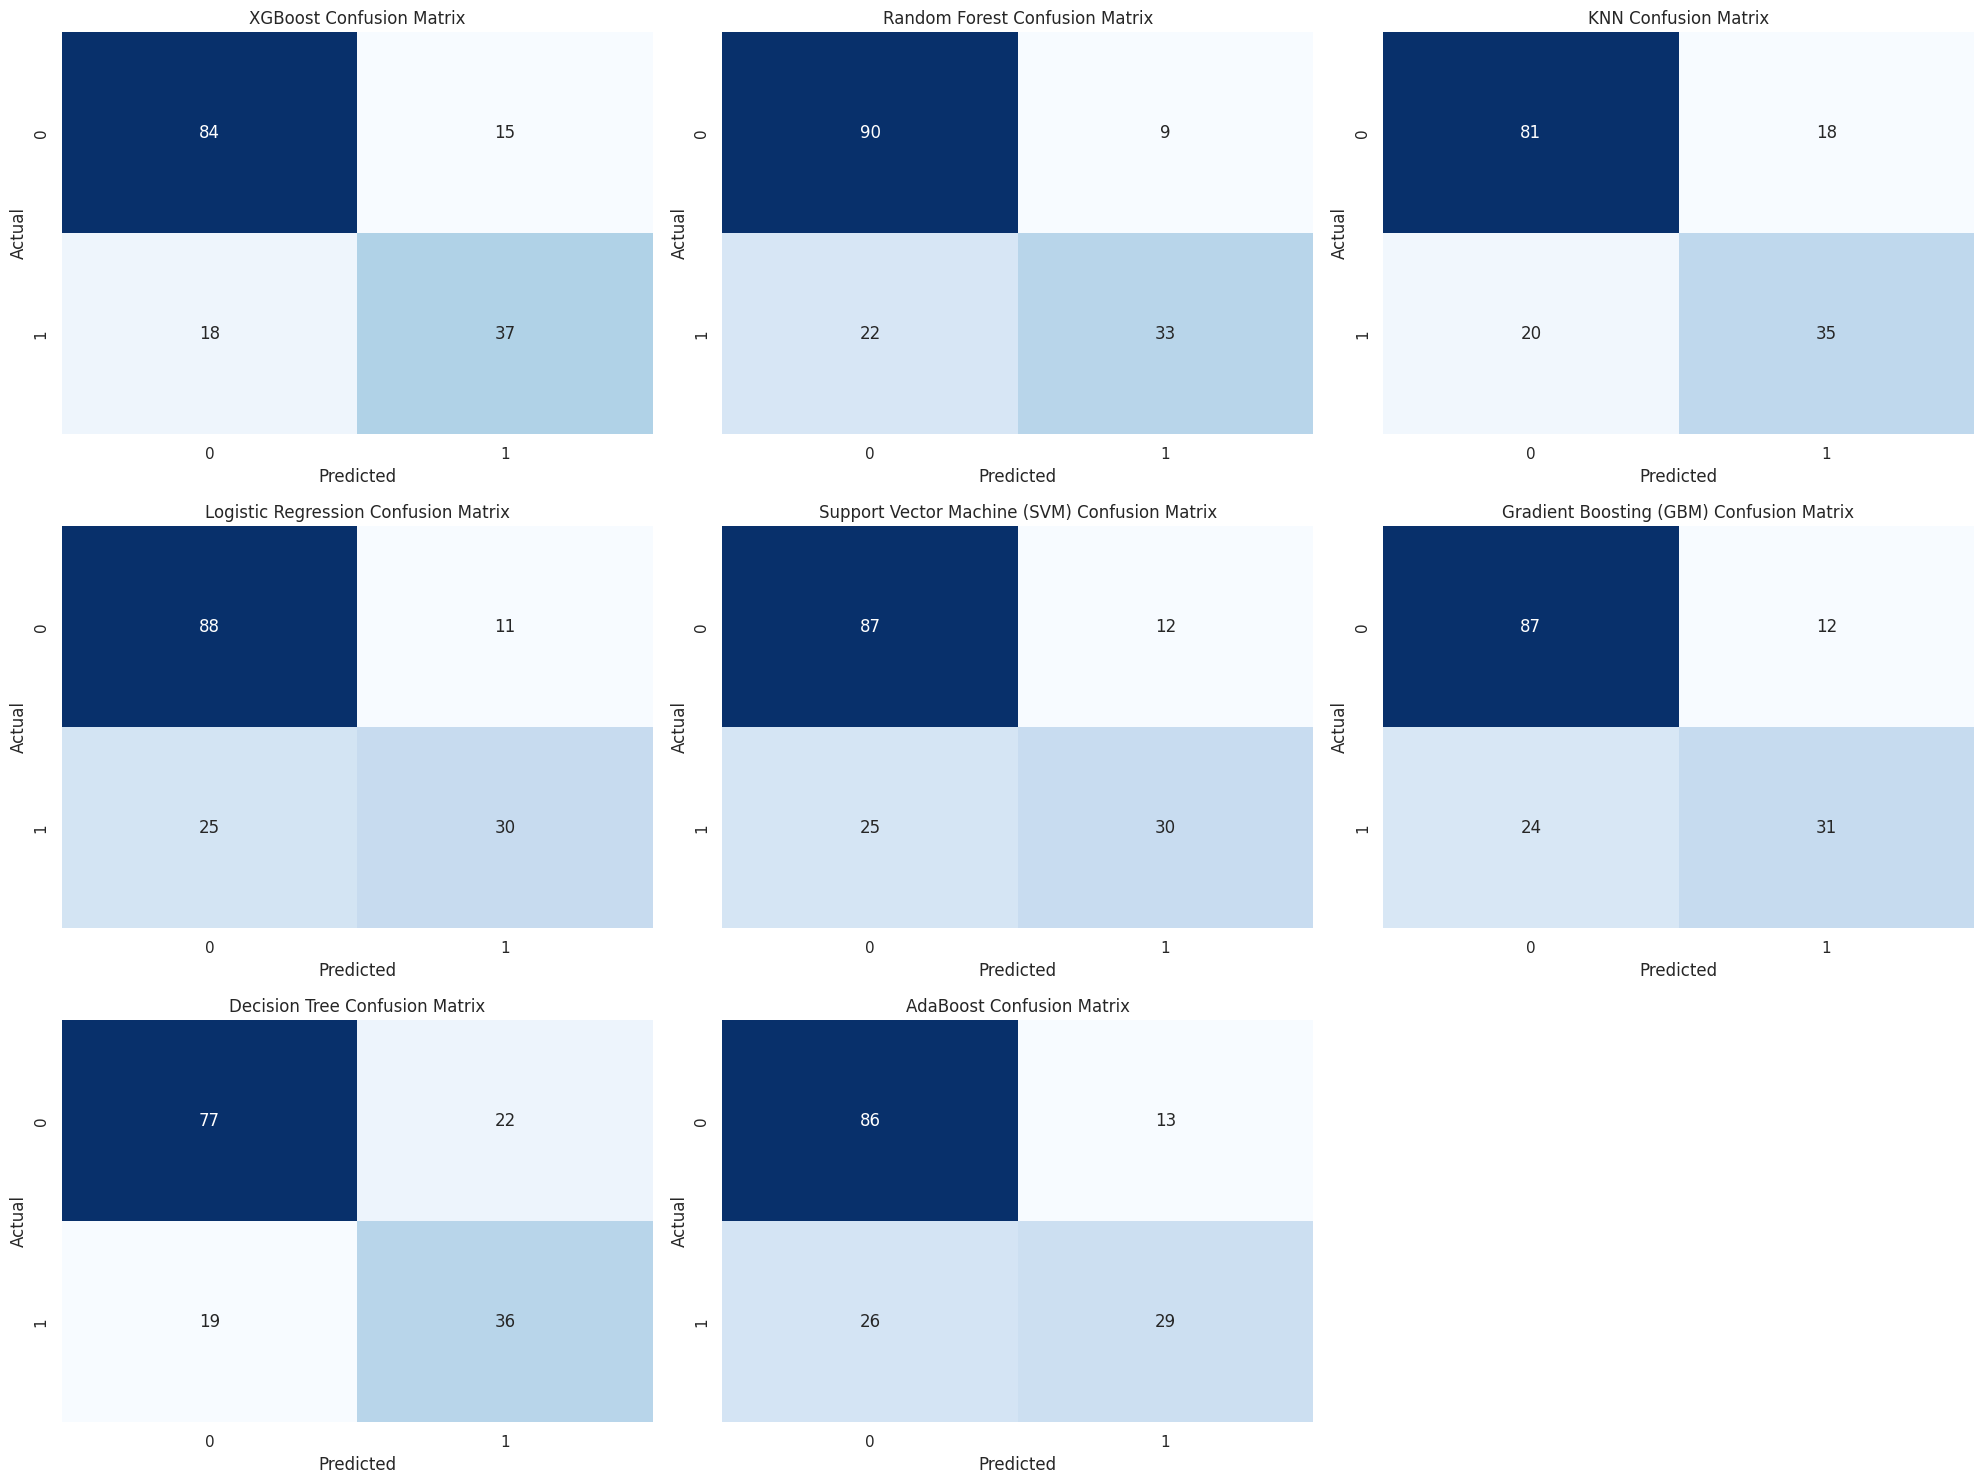

In [ ]:
# Plot confusion matrices
plt.figure(figsize=(20, 15))
for i, (name, metrics) in enumerate(results.items()):
    plt.subplot(3, 3, i + 1)
    sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.tight_layout()
plt.show()

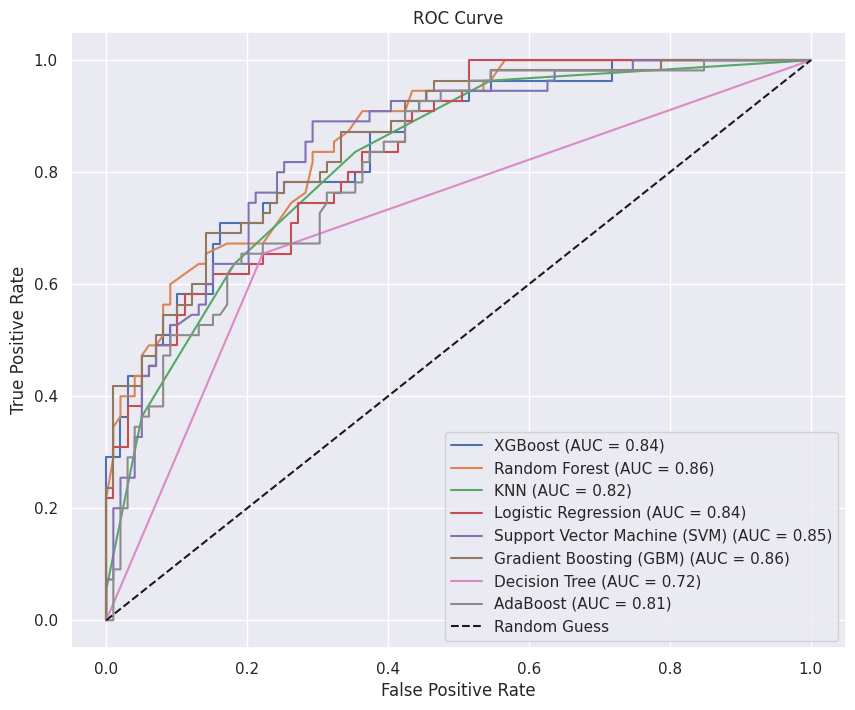

In [ ]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, metrics in results.items():
    plt.plot(metrics['fpr'], metrics['tpr'], label=f"{name} (AUC = {metrics['roc_auc']:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

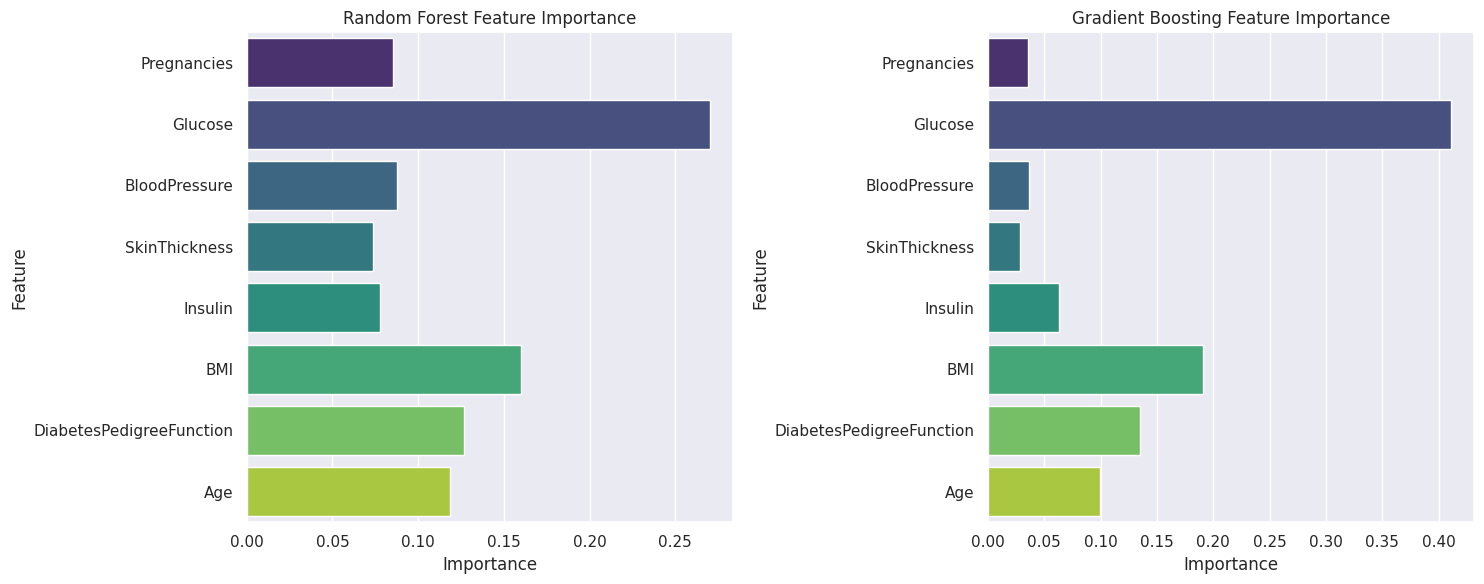

In [ ]:
# Feature importance for Random Forest
rf_model = models["Random Forest"]
importances_rf = rf_model.feature_importances_

# Feature importance for Gradient Boosting
gbm_model = models["Gradient Boosting (GBM)"]
importances_gbm = gbm_model.feature_importances_

# Plot feature importance
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=importances_rf, y=X.columns, palette="viridis")
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")

plt.subplot(1, 2, 2)
sns.barplot(x=importances_gbm, y=X.columns, palette="viridis")
plt.title("Gradient Boosting Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")

plt.tight_layout()
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the Neural Network
class DiabetesNN(nn.Module):
    def __init__(self, input_dim):
        super(DiabetesNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)
        self.dropout = nn.Dropout(0.2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return self.sigmoid(x)

# Convert data to PyTorch tensors
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)# Create DataLoader

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
model = DiabetesNN(input_dim)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

# Early stopping
early_stopping_patience = 10
best_loss = np.inf
epochs_no_improve = 0

# Track metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
val_auc_scores = []

# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        predicted = (outputs > 0.5).float()
        correct_train += (predicted == batch_y).sum().item()
        total_train += batch_y.size(0)

    # Calculate training metrics
    train_loss = running_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation phase
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor).item()
        val_predicted = (val_outputs > 0.5).float()
        val_accuracy = (val_predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)
        val_auc = roc_auc_score(y_test_tensor.numpy(), val_outputs.numpy())

    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    val_auc_scores.append(val_auc)

    # Print metrics
    print(f"Epoch {epoch + 1}/{epochs}")
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
    print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}, Val AUC: {val_auc:.4f}")

    # Early stopping
    if val_loss < best_loss:
        best_loss = val_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), "best_model.pth")  # Save the best model
    else:
        epochs_no_improve += 1
        if epochs_no_improve == early_stopping_patience:
            print(f"Early stopping at epoch {epoch + 1}")
            break

    # Learning rate scheduling
    scheduler.step(val_loss)

# Load the best model
model.load_state_dict(torch.load("best_model.pth"))

Epoch 1/100
Train Loss: 0.7154, Train Accuracy: 0.3762
Val Loss: 0.6755, Val Accuracy: 0.7208, Val AUC: 0.8325
Epoch 2/100
Train Loss: 0.6579, Train Accuracy: 0.6808
Val Loss: 0.5909, Val Accuracy: 0.6883, Val AUC: 0.8630
Epoch 3/100
Train Loss: 0.5732, Train Accuracy: 0.6954
Val Loss: 0.5223, Val Accuracy: 0.7338, Val AUC: 0.8571
Epoch 4/100
Train Loss: 0.5202, Train Accuracy: 0.7378
Val Loss: 0.4895, Val Accuracy: 0.7857, Val AUC: 0.8529
Epoch 5/100
Train Loss: 0.4890, Train Accuracy: 0.7541
Val Loss: 0.4801, Val Accuracy: 0.7532, Val AUC: 0.8490
Epoch 6/100
Train Loss: 0.4774, Train Accuracy: 0.7720
Val Loss: 0.4719, Val Accuracy: 0.7532, Val AUC: 0.8448
Epoch 7/100
Train Loss: 0.4806, Train Accuracy: 0.7687
Val Loss: 0.4628, Val Accuracy: 0.7662, Val AUC: 0.8463
Epoch 8/100
Train Loss: 0.4782, Train Accuracy: 0.7834
Val Loss: 0.4587, Val Accuracy: 0.7727, Val AUC: 0.8446
Epoch 9/100
Train Loss: 0.4694, Train Accuracy: 0.7720
Val Loss: 0.4555, Val Accuracy: 0.7727, Val AUC: 0.8485
E

<All keys matched successfully>

In [ ]:
models.update({"Neural Network (PyTorch)": model})

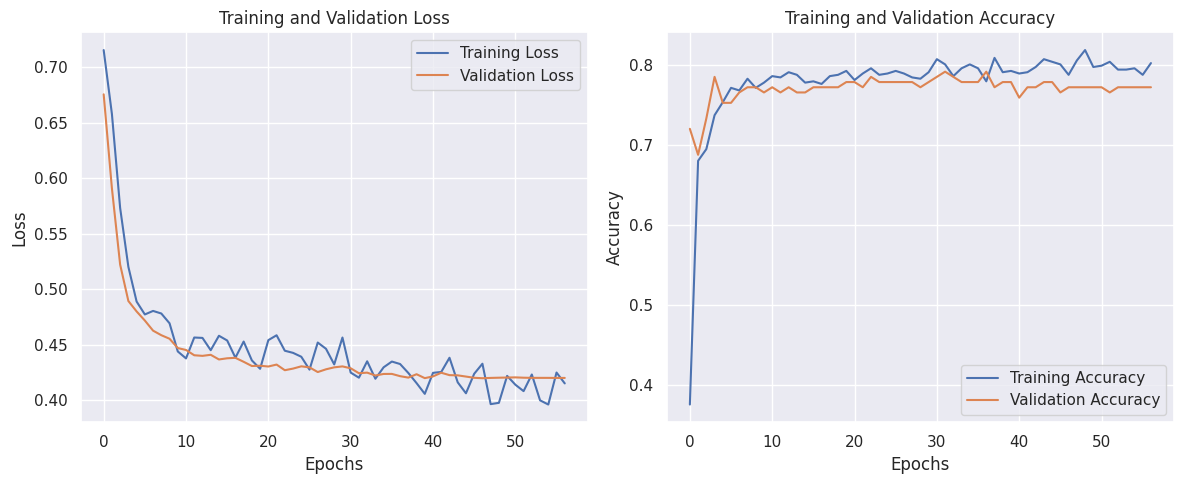

In [ ]:
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

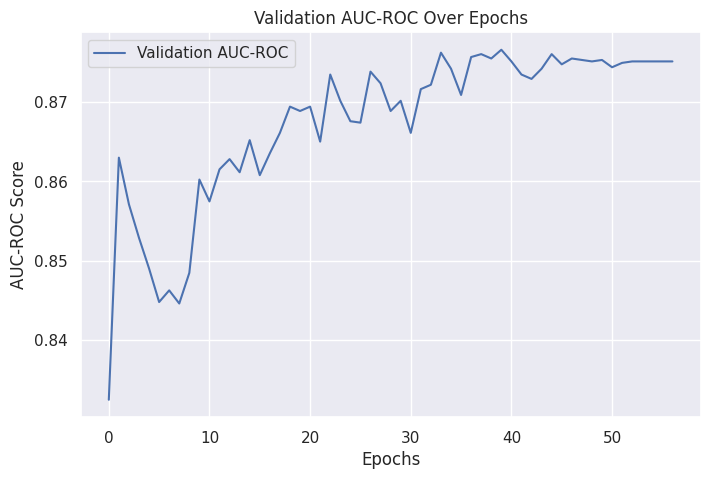

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(val_auc_scores, label='Validation AUC-ROC')
plt.title('Validation AUC-ROC Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('AUC-ROC Score')
plt.legend()
plt.show()

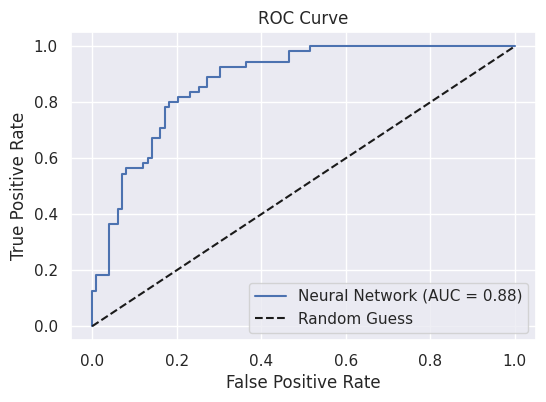

In [ ]:
# Final ROC Curve
model.eval()
with torch.no_grad():
    y_pred_proba_nn = model(X_test_tensor).numpy()
    fpr_nn, tpr_nn, _ = roc_curve(y_test_tensor.numpy(), y_pred_proba_nn)

plt.figure(figsize=(6, 4))
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC = {roc_auc_score(y_test_tensor.numpy(), y_pred_proba_nn):.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
# Function to evaluate a model and return metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model(X_test).detach().numpy()

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    return accuracy, precision, recall, f1, roc_auc

# Evaluate all models
model_metrics = {}
for name, model in models.items():
    if name == "Neural Network (PyTorch)":
        # PyTorch model requires special handling
        model.eval()
        with torch.no_grad():
            y_pred_proba = model(X_test_tensor).numpy()
            y_pred = (y_pred_proba > 0.5).astype(int)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        accuracy, precision, recall, f1, roc_auc = evaluate_model(model, X_test, y_test)

    model_metrics[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC-ROC": roc_auc
    }

# Convert metrics to a DataFrame
metrics_df = pd.DataFrame.from_dict(model_metrics, orient='index')
metrics_df = metrics_df.sort_values(by="AUC-ROC", ascending=False)
print(metrics_df)


                              Accuracy  Precision    Recall  F1-Score  \
Neural Network (PyTorch)      0.772727   0.727273  0.581818  0.646465   
Random Forest                 0.798701   0.785714  0.600000  0.680412   
Gradient Boosting (GBM)       0.766234   0.720930  0.563636  0.632653   
Support Vector Machine (SVM)  0.759740   0.714286  0.545455  0.618557   
XGBoost                       0.785714   0.711538  0.672727  0.691589   
Logistic Regression           0.766234   0.731707  0.545455  0.625000   
KNN                           0.753247   0.660377  0.636364  0.648148   
AdaBoost                      0.746753   0.690476  0.527273  0.597938   
Decision Tree                 0.733766   0.620690  0.654545  0.637168   

                               AUC-ROC  
Neural Network (PyTorch)      0.875482  
Random Forest                 0.861249  
Gradient Boosting (GBM)       0.856933  
Support Vector Machine (SVM)  0.847934  
XGBoost                       0.844628  
Logistic Regression    

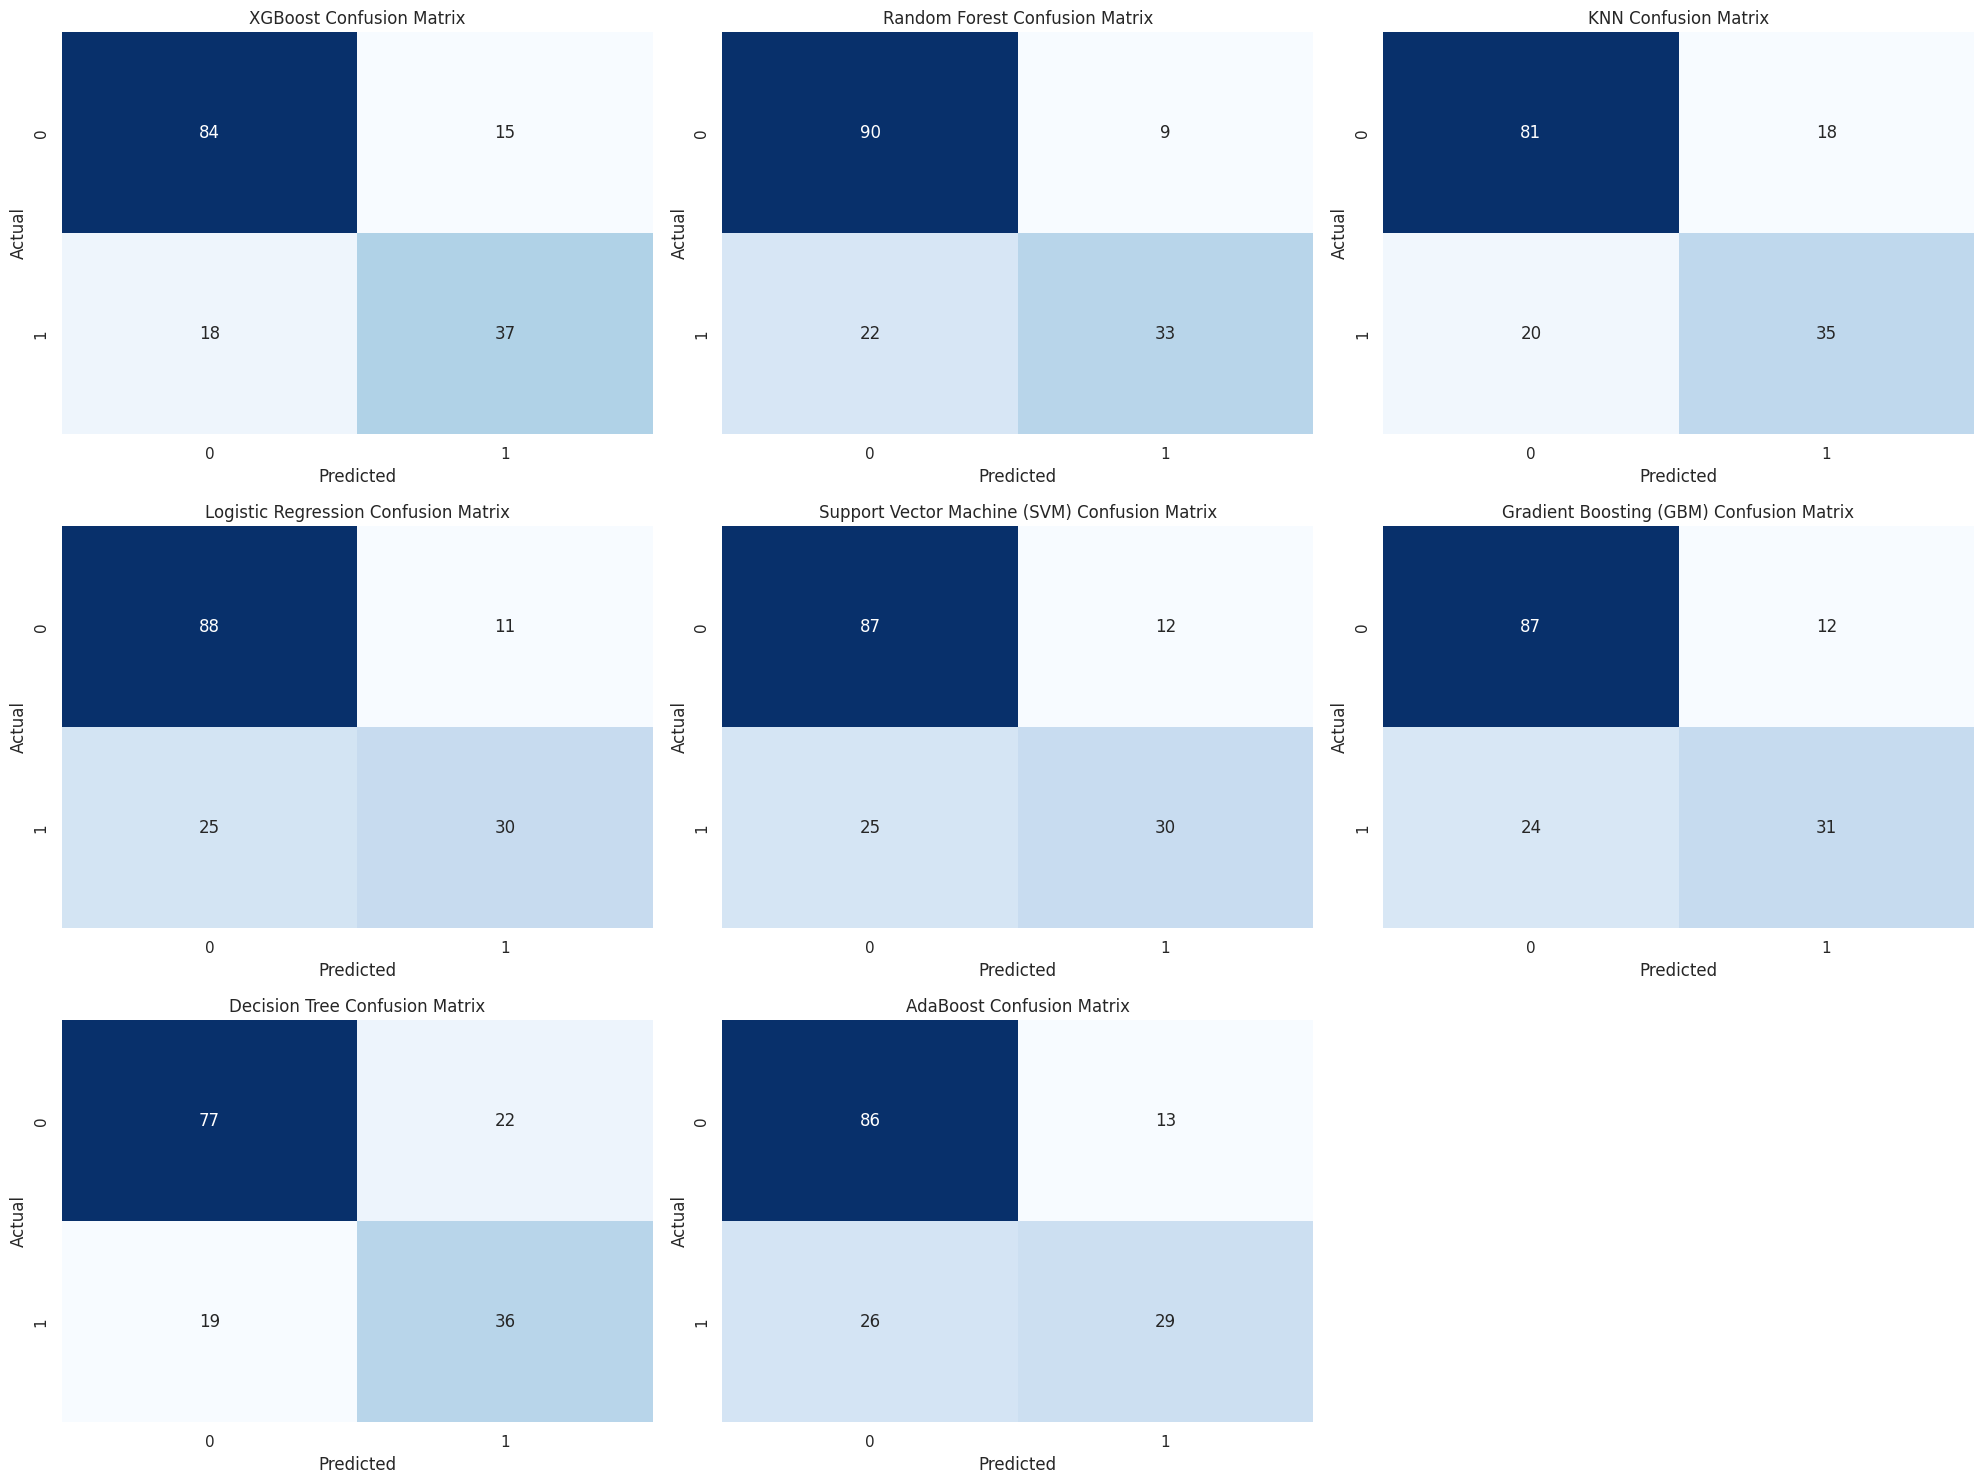

In [ ]:
# Plot confusion matrices
plt.figure(figsize=(20, 15))
for i, (name, metrics) in enumerate(results.items()):
    plt.subplot(3, 3, i + 1)
    sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.tight_layout()
plt.show()

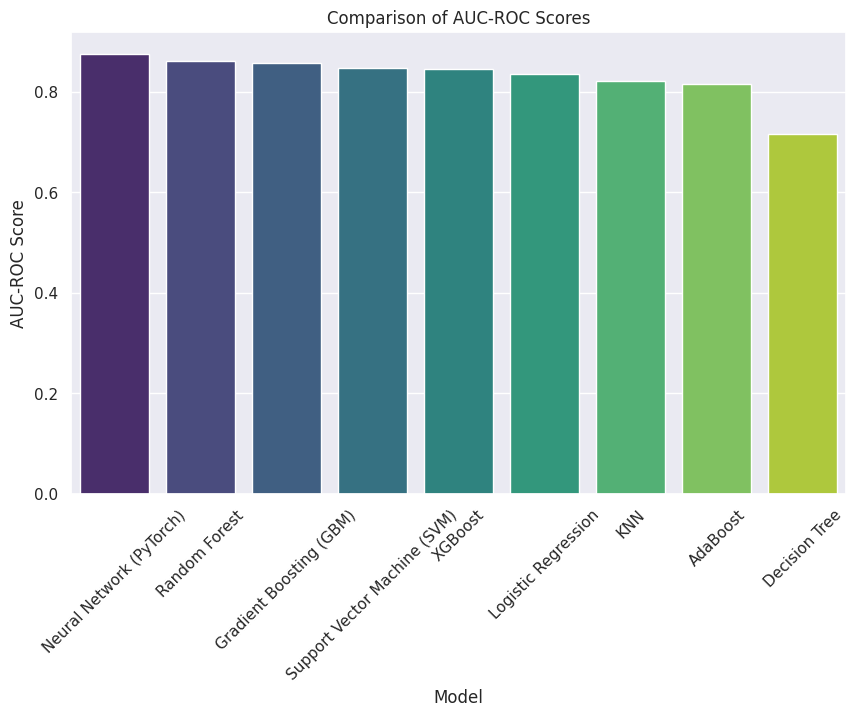

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_df.index, y=metrics_df["AUC-ROC"], palette="viridis")
plt.title("Comparison of AUC-ROC Scores")
plt.xlabel("Model")
plt.ylabel("AUC-ROC Score")
plt.xticks(rotation=45)
plt.show()

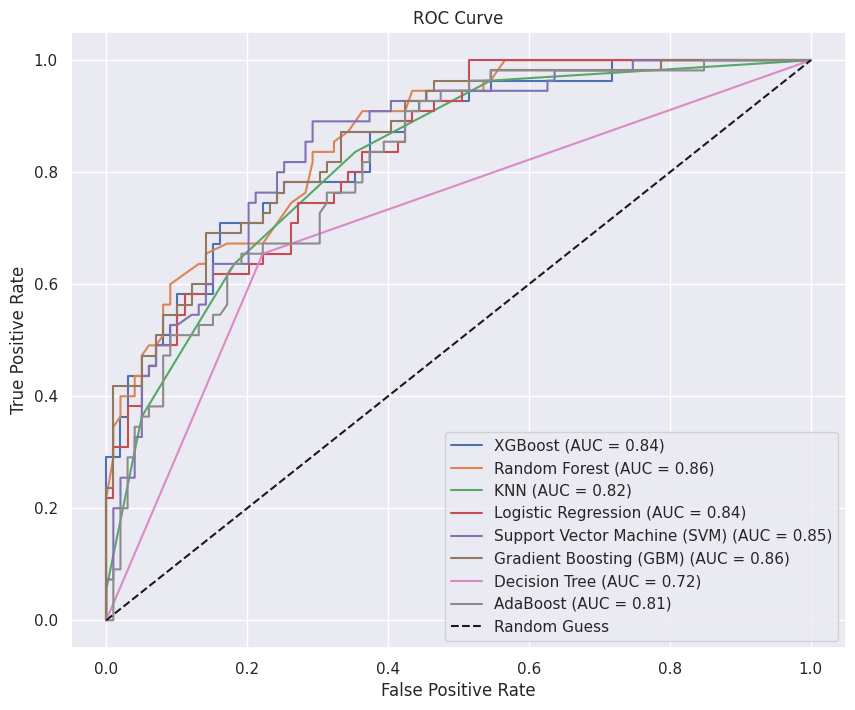

In [ ]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, metrics in results.items():
    plt.plot(metrics['fpr'], metrics['tpr'], label=f"{name} (AUC = {metrics['roc_auc']:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

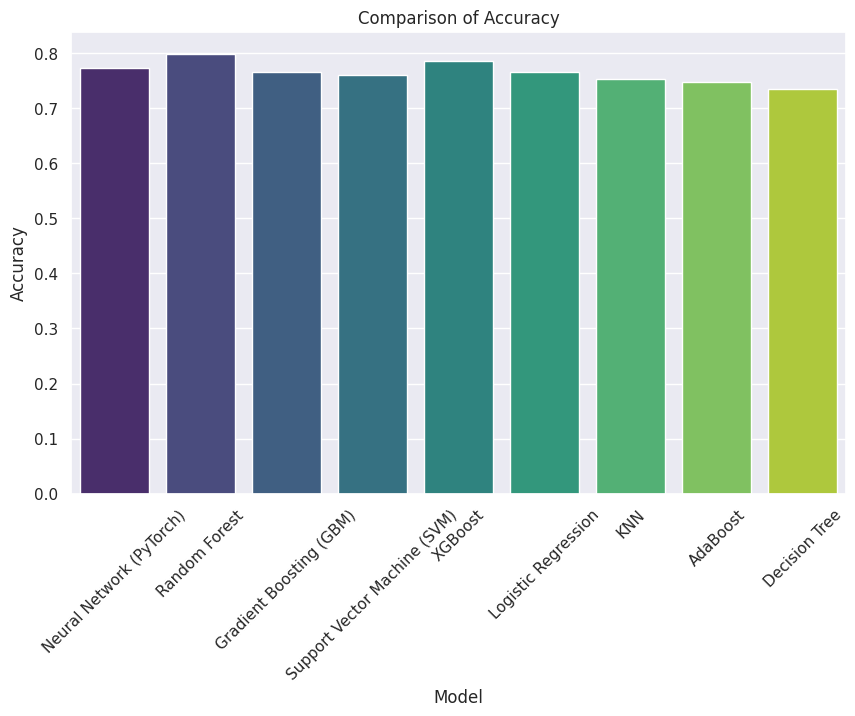

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_df.index, y=metrics_df["Accuracy"], palette="viridis")
plt.title("Comparison of Accuracy")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

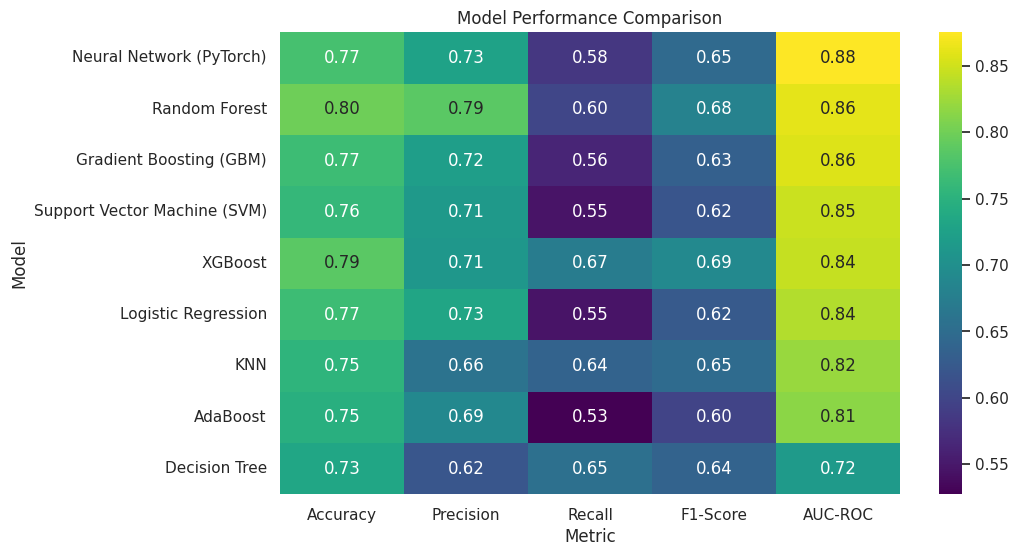

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df, annot=True, cmap="viridis", fmt=".2f")
plt.title("Model Performance Comparison")
plt.xlabel("Metric")
plt.ylabel("Model")
plt.show()

In [ ]:
import torch
import joblib

# Save the PyTorch model
torch.save(model.state_dict(), "diabetes_model.pth")

# Save the scaler
joblib.dump(models["XGBoost"], "XGBoost_diabetes_model.pkl")


['XGBoost_diabetes_model.pkl']

In [ ]:
#the scaler for the deployment

joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [ ]:
# prompt: Give me a sample of that test data set before the scaler applied in a csv

import pandas as pd
import numpy as np

# Load the dataset (assuming you have 'diabetes.csv' in your current directory)
try:
    df = pd.read_csv('diabetes.csv')
except FileNotFoundError:
    print("Error: diabetes.csv not found. Please upload the dataset.")
    exit()

# Create a copy to avoid modifying the original DataFrame
df_copy = df.copy(deep=True)


# Replace 0 values with NaN in specified columns
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Fill NaN values
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

# Save the DataFrame to a CSV file
df_copy.to_csv('diabetes_before_scaling.csv', index=False)
print("Data before scaling saved to diabetes_before_scaling.csv")


Error: diabetes.csv not found. Please upload the dataset.
Data before scaling saved to diabetes_before_scaling.csv
